In [1]:
import warnings, os, pandas as pd, requests, json
from datetime import datetime
warnings.filterwarnings("ignore", category=DeprecationWarning, module=".*")

In [2]:
import matplotlib as mpl
mpl.rcParams['font.family'] = 'Libre Franklin'
mpl.rcParams['figure.dpi'] = 200

We will only use 2000 onwards. For data of 2017 onwards, it is through an API since it is still for an update at a given time.

In [3]:
# Dataset IDs so we won't be downloading it repetitively for updated versions

# data_1990 = "d_ebc5ab87086db484f88045b47411ebc5"
# data_2000 = "d_43f493c6c50d54243cc1eab0df142d6a"
# data_2012 = "d_2d5ff9ea31397b66239f245f57751537"
# data_2015 = "d_ea9ed51da2787afaf8e51f827c304208"
# data_2017 = "d_8b84c4ee58e3cfc0ece0d773c8ca6abc"

In [4]:
folder_path = '../data/'

csv_list = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith('.csv')]

dfs = []
for file in csv_list:
    try:
        df = pd.read_csv(file, on_bad_lines='skip', sep=None, engine='python')  # Let pandas guess separator
        dfs.append(df)
    except Exception as e:
        print(f"Error reading {file}: {e}")

df = pd.concat(dfs, ignore_index=True)
df

month        town  flat_type block       street_name storey_range  \
0       2000-01  ANG MO KIO     3 ROOM   170  ANG MO KIO AVE 4     07 TO 09   
1       2000-01  ANG MO KIO     3 ROOM   174  ANG MO KIO AVE 4     04 TO 06   
2       2000-01  ANG MO KIO     3 ROOM   216  ANG MO KIO AVE 1     07 TO 09   
3       2000-01  ANG MO KIO     3 ROOM   215  ANG MO KIO AVE 1     07 TO 09   
4       2000-01  ANG MO KIO     3 ROOM   218  ANG MO KIO AVE 1     07 TO 09   
...         ...         ...        ...   ...               ...          ...   
664396  2025-02      YISHUN  EXECUTIVE   723      YISHUN ST 71     07 TO 09   
664397  2025-01      YISHUN  EXECUTIVE   836      YISHUN ST 81     01 TO 03   
664398  2025-02      YISHUN  EXECUTIVE   824      YISHUN ST 81     01 TO 03   
664399  2025-02      YISHUN  EXECUTIVE   826      YISHUN ST 81     10 TO 12   
664400  2025-04      YISHUN  EXECUTIVE   877      YISHUN ST 81     07 TO 09   

        floor_area_sqm      flat_model  lease_commence_date  resale_price  \
0                 69.0        Improved                 1986      147000.0   
1                 61.0        Improved                 1986      144000.0   
2                 73.0  New Generation                 1976      159000.0   
3                 73.0  New Generation                 1976      167000.0   
4                 67.0  New Generation                 1976      163000.0   
...                ...             ...                  ...           ...   
664396           146.0      Maisonette                 1986      818888.0   
664397           146.0      Maisonette                 1988      960000.0   
664398           145.0       Apartment                 1987      868888.0   
664399           146.0      Maisonette                 1988     1100888.0   
664400           142.0       Apartment                 1987      988000.0   

           remaining_lease  
0                      NaN  
1                      NaN  
2                      NaN  
3                      NaN  
4                      NaN  
...                    ...  
664396  60 years 05 months  
664397  62 years 02 months  
664398  61 years 10 months  
664399            62 years  
664400  61 years 09 months  

[664401 rows x 11 columns]

In [5]:
df.isnull().sum()

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        421854
dtype: int64

In [6]:
# s = requests.Session()
# s.headers.update({'referer': 'https://colab.research.google.com'})
# base_url = "https://api-production.data.gov.sg"
# url = base_url + f"/v2/public/api/datasets/{data_2017}/metadata"
# print(url)
# response = s.get(url)
# data = response.json()['data']
# columnMetadata = data.pop('columnMetadata', None)

# print("Dataset Metadata:")
# print(json.dumps(data, indent=2))

# print("\nColumns:\n", list(columnMetadata['map'].values()))

In [7]:
# def download_file(DATASET_ID):
#   # initiate download
#   initiate_download_response = s.get(
#       f"https://api-open.data.gov.sg/v1/public/api/datasets/{DATASET_ID}/initiate-download",
#       headers={"Content-Type":"application/json"},
#       json={}
#   )
#   print(initiate_download_response.json()['data']['message'])

#   # poll download
#   MAX_POLLS = 5
#   for i in range(MAX_POLLS):
#     poll_download_response = s.get(
#         f"https://api-open.data.gov.sg/v1/public/api/datasets/{DATASET_ID}/poll-download",
#         headers={"Content-Type":"application/json"},
#         json={}
#     )
#     print("Poll download response:", poll_download_response.json())
#     if "url" in poll_download_response.json()['data']:
#       print(poll_download_response.json()['data']['url'])
#       DOWNLOAD_URL = poll_download_response.json()['data']['url']
#       df = pd.read_csv(DOWNLOAD_URL)

#       display(df.head())
#       print("\nDataframe loaded!")
#       return df
#     if i == MAX_POLLS - 1:
#       print(f"{i+1}/{MAX_POLLS}: No result found, possible error with dataset, please try again or let us know at https://go.gov.sg/datagov-supportform\n")
#     else:
#       print(f"{i+1}/{MAX_POLLS}: No result yet, continuing to poll\n")
#     time.sleep(3)

# df_2017 = download_file(data_2017)

In [8]:
df.drop(columns=['remaining_lease'], inplace=True)

In [9]:
print(df.columns)

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price'],
      dtype='object')


In [10]:
# # Concatenate dataframes
# df_combined = pd.concat([df, df_2017], ignore_index=True)
# df_combined.reset_index(drop=True, inplace=True)

In [11]:
# Convert month into a datetime object
df['month'] = pd.to_datetime(df['month'], format='%Y-%m', errors='coerce')

# Create a new column with the full month name (e.g., 'January')
# df['month_name'] = df['month'].dt.strftime('%B')

In [12]:
current_year = pd.to_datetime('today').year

# Convert lease_commence_date to datetime format
df['lease_commence_date'] = pd.to_datetime(df['lease_commence_date'], format='%Y')

df['Lease Age'] = current_year - df['lease_commence_date'].dt.year

In [13]:
df

month        town  flat_type block       street_name storey_range  \
0      2000-01-01  ANG MO KIO     3 ROOM   170  ANG MO KIO AVE 4     07 TO 09   
1      2000-01-01  ANG MO KIO     3 ROOM   174  ANG MO KIO AVE 4     04 TO 06   
2      2000-01-01  ANG MO KIO     3 ROOM   216  ANG MO KIO AVE 1     07 TO 09   
3      2000-01-01  ANG MO KIO     3 ROOM   215  ANG MO KIO AVE 1     07 TO 09   
4      2000-01-01  ANG MO KIO     3 ROOM   218  ANG MO KIO AVE 1     07 TO 09   
...           ...         ...        ...   ...               ...          ...   
664396 2025-02-01      YISHUN  EXECUTIVE   723      YISHUN ST 71     07 TO 09   
664397 2025-01-01      YISHUN  EXECUTIVE   836      YISHUN ST 81     01 TO 03   
664398 2025-02-01      YISHUN  EXECUTIVE   824      YISHUN ST 81     01 TO 03   
664399 2025-02-01      YISHUN  EXECUTIVE   826      YISHUN ST 81     10 TO 12   
664400 2025-04-01      YISHUN  EXECUTIVE   877      YISHUN ST 81     07 TO 09   

        floor_area_sqm      flat_model lease_commence_date  resale_price  \
0                 69.0        Improved          1986-01-01      147000.0   
1                 61.0        Improved          1986-01-01      144000.0   
2                 73.0  New Generation          1976-01-01      159000.0   
3                 73.0  New Generation          1976-01-01      167000.0   
4                 67.0  New Generation          1976-01-01      163000.0   
...                ...             ...                 ...           ...   
664396           146.0      Maisonette          1986-01-01      818888.0   
664397           146.0      Maisonette          1988-01-01      960000.0   
664398           145.0       Apartment          1987-01-01      868888.0   
664399           146.0      Maisonette          1988-01-01     1100888.0   
664400           142.0       Apartment          1987-01-01      988000.0   

        Lease Age  
0              39  
1              39  
2              49  
3              49  
4              49  
...           ...  
664396         39  
664397         37  
664398         38  
664399         37  
664400         38  

[664401 rows x 11 columns]

In [14]:
df = df[df['month'] >= pd.to_datetime('2010-01-01 00:00:00')]
df

month        town  flat_type block       street_name storey_range  \
309328 2010-01-01  ANG MO KIO     2 ROOM   323  ANG MO KIO AVE 3     10 TO 12   
309329 2010-01-01  ANG MO KIO     2 ROOM   314  ANG MO KIO AVE 3     01 TO 03   
309330 2010-01-01  ANG MO KIO     2 ROOM   314  ANG MO KIO AVE 3     07 TO 09   
309331 2010-01-01  ANG MO KIO     2 ROOM   314  ANG MO KIO AVE 3     07 TO 09   
309332 2010-01-01  ANG MO KIO     2 ROOM   323  ANG MO KIO AVE 3     01 TO 03   
...           ...         ...        ...   ...               ...          ...   
664396 2025-02-01      YISHUN  EXECUTIVE   723      YISHUN ST 71     07 TO 09   
664397 2025-01-01      YISHUN  EXECUTIVE   836      YISHUN ST 81     01 TO 03   
664398 2025-02-01      YISHUN  EXECUTIVE   824      YISHUN ST 81     01 TO 03   
664399 2025-02-01      YISHUN  EXECUTIVE   826      YISHUN ST 81     10 TO 12   
664400 2025-04-01      YISHUN  EXECUTIVE   877      YISHUN ST 81     07 TO 09   

        floor_area_sqm  flat_model lease_commence_date  resale_price  \
309328            44.0    Improved          1977-01-01      202000.0   
309329            44.0    Improved          1978-01-01      208000.0   
309330            44.0    Improved          1978-01-01      180000.0   
309331            44.0    Improved          1978-01-01      180000.0   
309332            44.0    Improved          1977-01-01      198000.0   
...                ...         ...                 ...           ...   
664396           146.0  Maisonette          1986-01-01      818888.0   
664397           146.0  Maisonette          1988-01-01      960000.0   
664398           145.0   Apartment          1987-01-01      868888.0   
664399           146.0  Maisonette          1988-01-01     1100888.0   
664400           142.0   Apartment          1987-01-01      988000.0   

        Lease Age  
309328         48  
309329         47  
309330         47  
309331         47  
309332         48  
...           ...  
664396         39  
664397         37  
664398         38  
664399         37  
664400         38  

[355073 rows x 11 columns]

In [15]:
df['town'].unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT PANJANG', 'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG',
       'CLEMENTI', 'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'PASIR RIS', 'PUNGGOL',
       'QUEENSTOWN', 'SEMBAWANG', 'SENGKANG', 'SERANGOON', 'TAMPINES',
       'TOA PAYOH', 'WOODLANDS', 'YISHUN'], dtype=object)

In [16]:
import geopandas as gpd

maps = gpd.read_file('../data/singapore/maps/1-region.geojson')
maps

name                                           geometry
0     CENTRAL REGION  MULTIPOLYGON (((103.84875 1.36303, 103.84924 1...
1        EAST REGION  MULTIPOLYGON (((103.95322 1.38202, 103.9535 1....
2       NORTH REGION  MULTIPOLYGON (((103.77664 1.45145, 103.77673 1...
3  NORTH-EAST REGION  MULTIPOLYGON (((103.89715 1.41502, 103.89741 1...
4        WEST REGION  MULTIPOLYGON (((103.69729 1.30754, 103.69728 1...

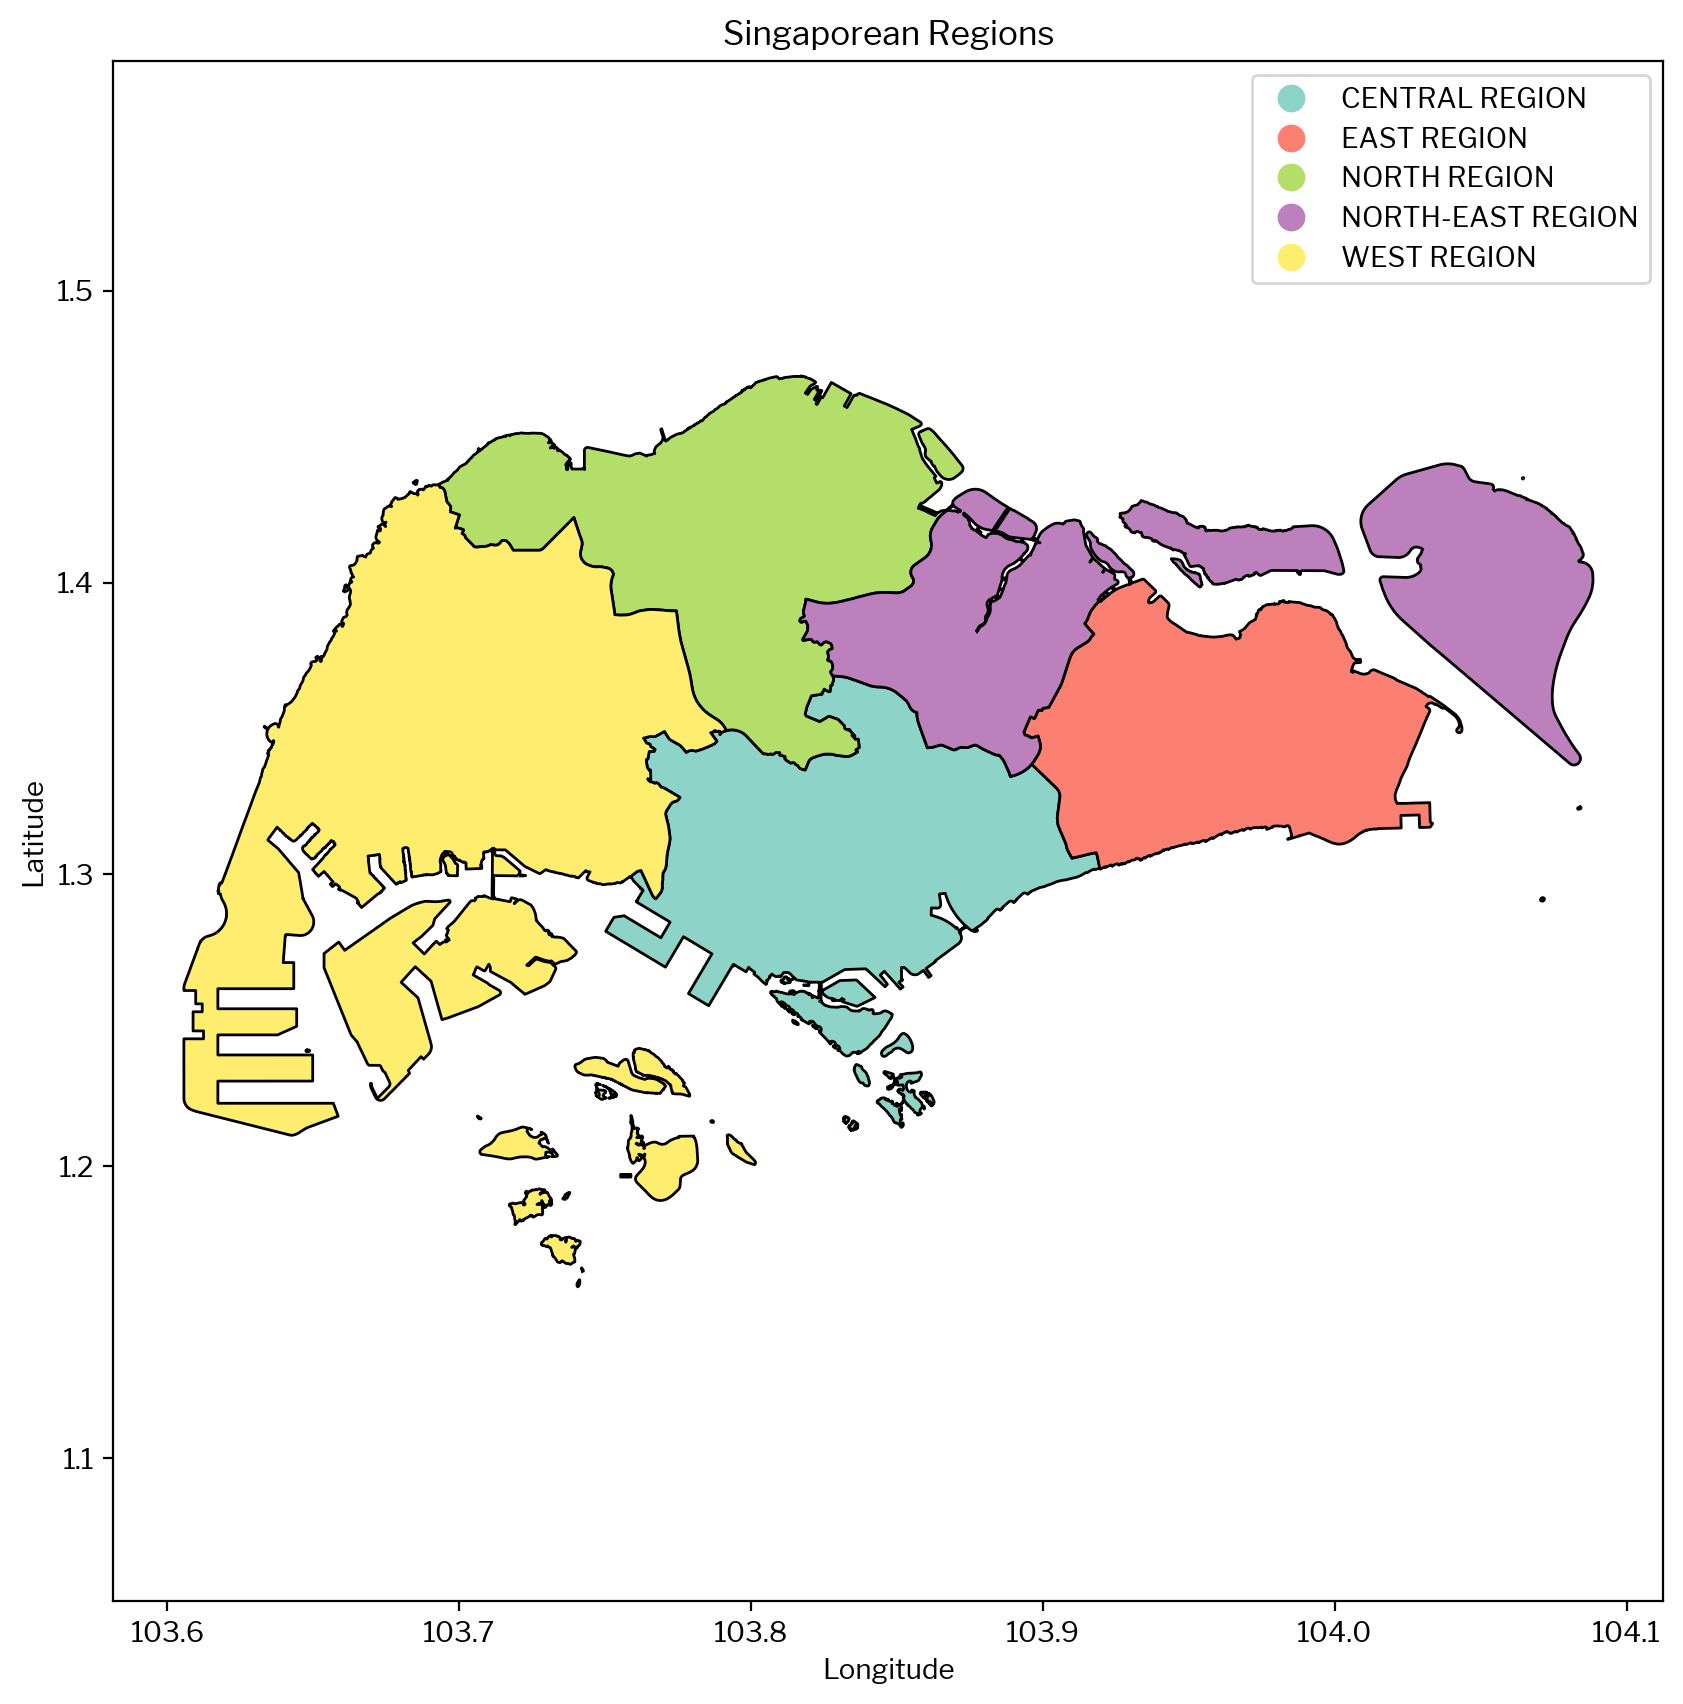

In [17]:
# Visualize the maps using plotly

import matplotlib.pyplot as plt

maps.plot(edgecolor='black', facecolor='lightblue', figsize=(10, 10), column='name', cmap='Set3', legend=True)

plt.title('Singaporean Regions')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.axis('equal')  # keeps aspect ratio correct
plt.show()

In [18]:
df_sg = df.copy()

In [19]:
# Rename all instances of Multi generation into Multi-generation
df_sg['flat_type'] = df_sg['flat_type'].str.replace('MULTI GENERATION', 'MULTI-GENERATION')

In [20]:
region_groups = {
    'CENTRAL REGION': ['BISHAN', 'BUKIT MERAH', 'BUKIT TIMAH', 'CENTRAL AREA', 'GEYLANG', 'KALLANG/WHAMPOA', 'MARINE PARADE', 'NOVENA', 'QUEENSTOWN', 'SOUTHERN ISLANDS', 'TANGLIN', 'TOA PAYOH'],
    'EAST REGION': ['BEDOK', 'CHANGI', 'CHANGI BAY', 'PASIR RIS', 'PAYA LEBAR', 'TAMPINES'],
    'NORTH REGION': ['CENTRAL WATER CATCHMENT', 'LIM CHU KANG', 'MANDAI', 'SEMBAWANG', 'SIMPANG', 'SUNGEI KADUT', 'WOODLANDS', 'YISHUN'],
    'NORTH-EAST REGION': ['ANG MO KIO', 'HOUGANG', 'NORTH-EASTERN ISLANDS', 'PUNGGOL', 'SELETAR', 'SENGKANG', 'SERANGOON'],
    'WEST REGION': ['BOON LAY', 'BUKIT BATOK', 'BUKIT PANJANG', 'CHOA CHU KANG', 'CLEMENTI', 'JURONG WEST', 'JURONG EAST', 'PIONEER', 'TENGAH', 'TUAS', 'WESTERN ISLANDS', 'WESTERN WATER CATCHMENT']
}

df_sg['region'] = df_sg['town'].apply(lambda x: next((group for group, areas in region_groups.items() if x in areas), 'Other'))

In [21]:
# Rename 'name' column in maps to 'region' (or 'town', if matching df_sg)
maps = maps.rename(columns={'name': 'region'})  # adjust if needed

# Keep only relevant columns
maps = maps[['region', 'geometry']]

# Merge with your original DataFrame on 'region'
df_sg = df_sg.merge(maps, on='region', how='left')
df_sg

month        town  flat_type block       street_name storey_range  \
0      2010-01-01  ANG MO KIO     2 ROOM   323  ANG MO KIO AVE 3     10 TO 12   
1      2010-01-01  ANG MO KIO     2 ROOM   314  ANG MO KIO AVE 3     01 TO 03   
2      2010-01-01  ANG MO KIO     2 ROOM   314  ANG MO KIO AVE 3     07 TO 09   
3      2010-01-01  ANG MO KIO     2 ROOM   314  ANG MO KIO AVE 3     07 TO 09   
4      2010-01-01  ANG MO KIO     2 ROOM   323  ANG MO KIO AVE 3     01 TO 03   
...           ...         ...        ...   ...               ...          ...   
355068 2025-02-01      YISHUN  EXECUTIVE   723      YISHUN ST 71     07 TO 09   
355069 2025-01-01      YISHUN  EXECUTIVE   836      YISHUN ST 81     01 TO 03   
355070 2025-02-01      YISHUN  EXECUTIVE   824      YISHUN ST 81     01 TO 03   
355071 2025-02-01      YISHUN  EXECUTIVE   826      YISHUN ST 81     10 TO 12   
355072 2025-04-01      YISHUN  EXECUTIVE   877      YISHUN ST 81     07 TO 09   

        floor_area_sqm  flat_model lease_commence_date  resale_price  \
0                 44.0    Improved          1977-01-01      202000.0   
1                 44.0    Improved          1978-01-01      208000.0   
2                 44.0    Improved          1978-01-01      180000.0   
3                 44.0    Improved          1978-01-01      180000.0   
4                 44.0    Improved          1977-01-01      198000.0   
...                ...         ...                 ...           ...   
355068           146.0  Maisonette          1986-01-01      818888.0   
355069           146.0  Maisonette          1988-01-01      960000.0   
355070           145.0   Apartment          1987-01-01      868888.0   
355071           146.0  Maisonette          1988-01-01     1100888.0   
355072           142.0   Apartment          1987-01-01      988000.0   

        Lease Age             region  \
0              48  NORTH-EAST REGION   
1              47  NORTH-EAST REGION   
2              47  NORTH-EAST REGION   
3              47  NORTH-EAST REGION   
4              48  NORTH-EAST REGION   
...           ...                ...   
355068         39       NORTH REGION   
355069         37       NORTH REGION   
355070         38       NORTH REGION   
355071         37       NORTH REGION   
355072         38       NORTH REGION   

                                                 geometry  
0       MULTIPOLYGON (((103.89715 1.41502, 103.89741 1...  
1       MULTIPOLYGON (((103.89715 1.41502, 103.89741 1...  
2       MULTIPOLYGON (((103.89715 1.41502, 103.89741 1...  
3       MULTIPOLYGON (((103.89715 1.41502, 103.89741 1...  
4       MULTIPOLYGON (((103.89715 1.41502, 103.89741 1...  
...                                                   ...  
355068  MULTIPOLYGON (((103.77664 1.45145, 103.77673 1...  
355069  MULTIPOLYGON (((103.77664 1.45145, 103.77673 1...  
355070  MULTIPOLYGON (((103.77664 1.45145, 103.77673 1...  
355071  MULTIPOLYGON (((103.77664 1.45145, 103.77673 1...  
355072  MULTIPOLYGON (((103.77664 1.45145, 103.77673 1...  

[355073 rows x 13 columns]

## ML

Using sklearn's gradient boosting models

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error, root_mean_squared_error

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, OrdinalEncoder

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

In [23]:
# Preprocess date fields early
df_sg['lease_commence_date'] = pd.to_datetime(df_sg['lease_commence_date'])
df_sg['lease_commence_year'] = df_sg['lease_commence_date'].dt.year
df_sg.drop(columns=['lease_commence_date'], inplace=True)

df_sg['year'] = df_sg['month'].dt.year
df_sg['month_num'] = df_sg['month'].dt.month

In [24]:
X = df_sg.drop(columns=['resale_price', 'geometry', 'month'])
y = df_sg['resale_price']

# Feature groups
categorical_features = ['town', 'flat_type', 'street_name', 'block', 'flat_model', 'region']
ordinal_features = ['storey_range']
numerical_features = ['floor_area_sqm', 'Lease Age', 'lease_commence_year', 'year', 'month_num']
# month_feature = ['month']

scaler = MinMaxScaler()
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
ordi = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

In [25]:
# # Complete pipeline with model
# model_pipeline = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('regressor', LinearRegression())
# ])

# # Train-test split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# # Fit model
# model_pipeline.fit(X_train, y_train)

In [26]:
# # Predict
# y_pred = model_pipeline.predict(X_test)

In [27]:
# # Metric: MSE, RMSE, MAE, MAPE, R2

# mse = mean_squared_error(y_test, y_pred)
# rmse = root_mean_squared_error(y_test, y_pred)
# mae = mean_absolute_error(y_test, y_pred)
# mape = mean_absolute_percentage_error(y_test, y_pred)

# r2 = r2_score(y_test, y_pred)

# # Print
# print(f"Mean Squared Error: {mse:.2f}")
# print(f"Root Mean Squared Error: {rmse:.2f}")
# print(f"Mean Absolute Error: {mae:.2f}")
# print(f"Mean Absolute Percentage Error: {mape:.2f}")
# print(f"R2 Score: {r2:.2f}")

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [29]:
# Fit and transform numerical
X_num_train = pd.DataFrame(scaler.fit_transform(X_train[numerical_features]), columns=numerical_features, index=X_train.index)
X_num_test = pd.DataFrame(scaler.transform(X_test[numerical_features]), columns=numerical_features, index=X_test.index)

# Fit and transform ordinal
X_ord_train = pd.DataFrame(ordi.fit_transform(X_train[ordinal_features]), columns=ordinal_features, index=X_train.index)
X_ord_test = pd.DataFrame(ordi.transform(X_test[ordinal_features]), columns=ordinal_features, index=X_test.index)

# Fit and transform categorical (One-Hot)
X_cat_train = pd.DataFrame(ohe.fit_transform(X_train[categorical_features]),
                           columns=ohe.get_feature_names_out(categorical_features),
                           index=X_train.index)
X_cat_test = pd.DataFrame(ohe.transform(X_test[categorical_features]),
                          columns=ohe.get_feature_names_out(categorical_features),
                          index=X_test.index)

In [30]:
X_train_processed = pd.concat([X_num_train, X_ord_train, X_cat_train], axis=1)
X_test_processed = pd.concat([X_num_test, X_ord_test, X_cat_test], axis=1)

In [31]:
lgbm = LGBMRegressor(n_estimators=1000, random_state=42)

# Fit model
lgbm.fit(X_train_processed, y_train)

# Predict
y_pred_lgbm = lgbm.predict(X_test_processed)

# Metric: MSE, RMSE, MAE, MAPE, R2
mse_lgbm = mean_squared_error(y_test, y_pred_lgbm)
rmse_lgbm = root_mean_squared_error(y_test, y_pred_lgbm)
mae_lgbm = mean_absolute_error(y_test, y_pred_lgbm)
mape_lgbm = mean_absolute_percentage_error(y_test, y_pred_lgbm)

r2_lgbm = r2_score(y_test, y_pred_lgbm)

# Print
print(f"Mean Squared Error: {mse_lgbm:.2f}")
print(f"Root Mean Squared Error: {rmse_lgbm:.2f}")
print(f"Mean Absolute Error: {mae_lgbm:.2f}")
print(f"Mean Absolute Percentage Error: {mape_lgbm:.2f}")
print(f"R2 Score: {r2_lgbm:.2f}")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002669 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6517
[LightGBM] [Info] Number of data points in the train set: 284058, number of used features: 3101
[LightGBM] [Info] Start training from score 478687.233048
Mean Squared Error: 653036117.78
Root Mean Squared Error: 25554.57
Mean Absolute Error: 18484.37
Mean Absolute Percentage Error: 0.04
R2 Score: 0.98


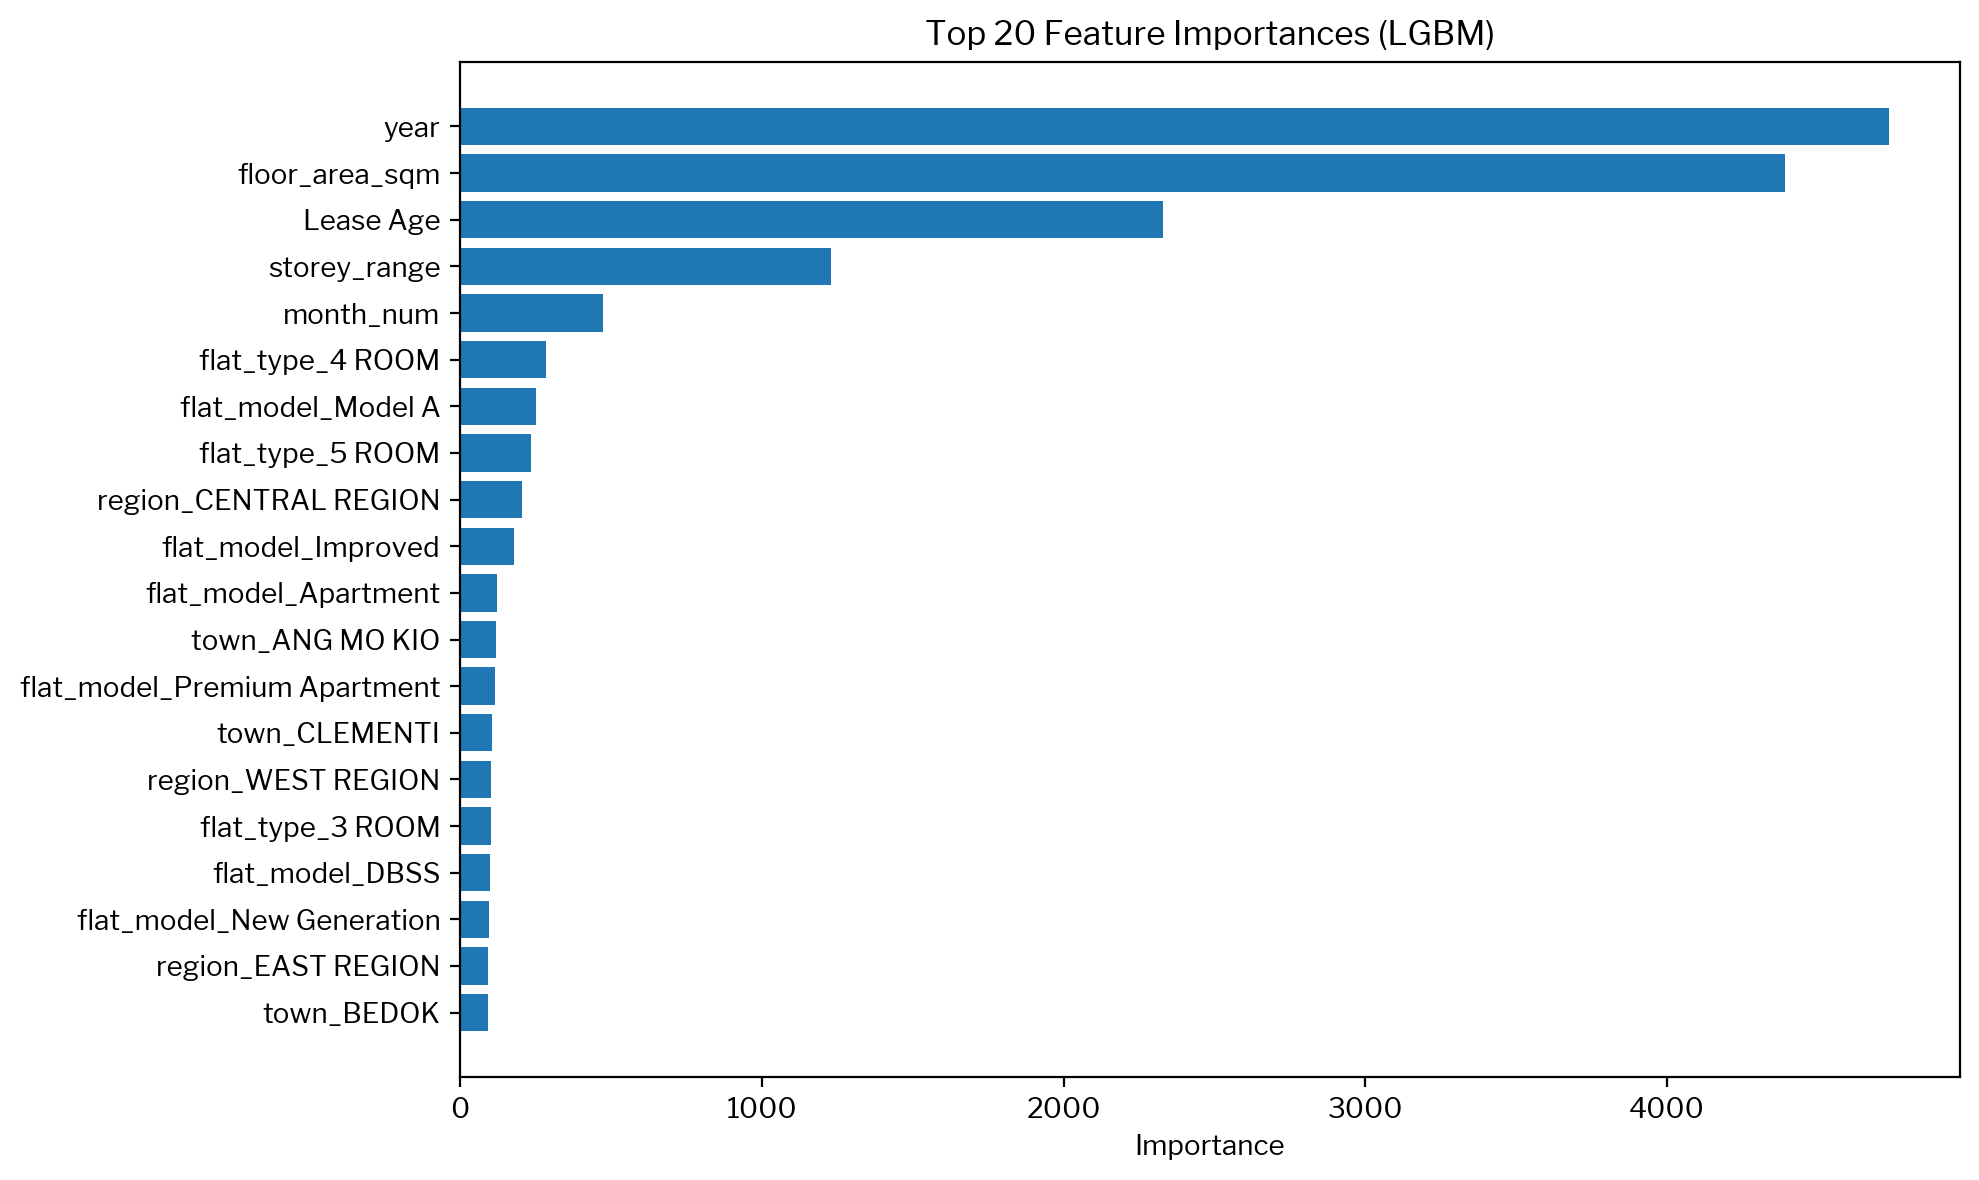

In [32]:
# Get feature importances from the model
importances = lgbm.feature_importances_

# Combine with feature names
feature_importance_df = pd.DataFrame({
    'feature': X_train_processed.columns,
    'importance': importances
}).sort_values(by='importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['feature'][:20][::-1], feature_importance_df['importance'][:20][::-1])
plt.xlabel('Importance')
plt.title('Top 20 Feature Importances (LGBM)')
plt.tight_layout()
plt.show()

In [33]:
import shap

In [34]:
shap.initjs()

In [35]:
X_sample_proctest = X_test_processed.sample(n=5000, random_state=42)

In [36]:
shap_explainer = shap.Explainer(lgbm, X_sample_proctest)
shap_values = shap_explainer(X_sample_proctest)

100%|===================| 4995/5000 [02:51<00:00]        

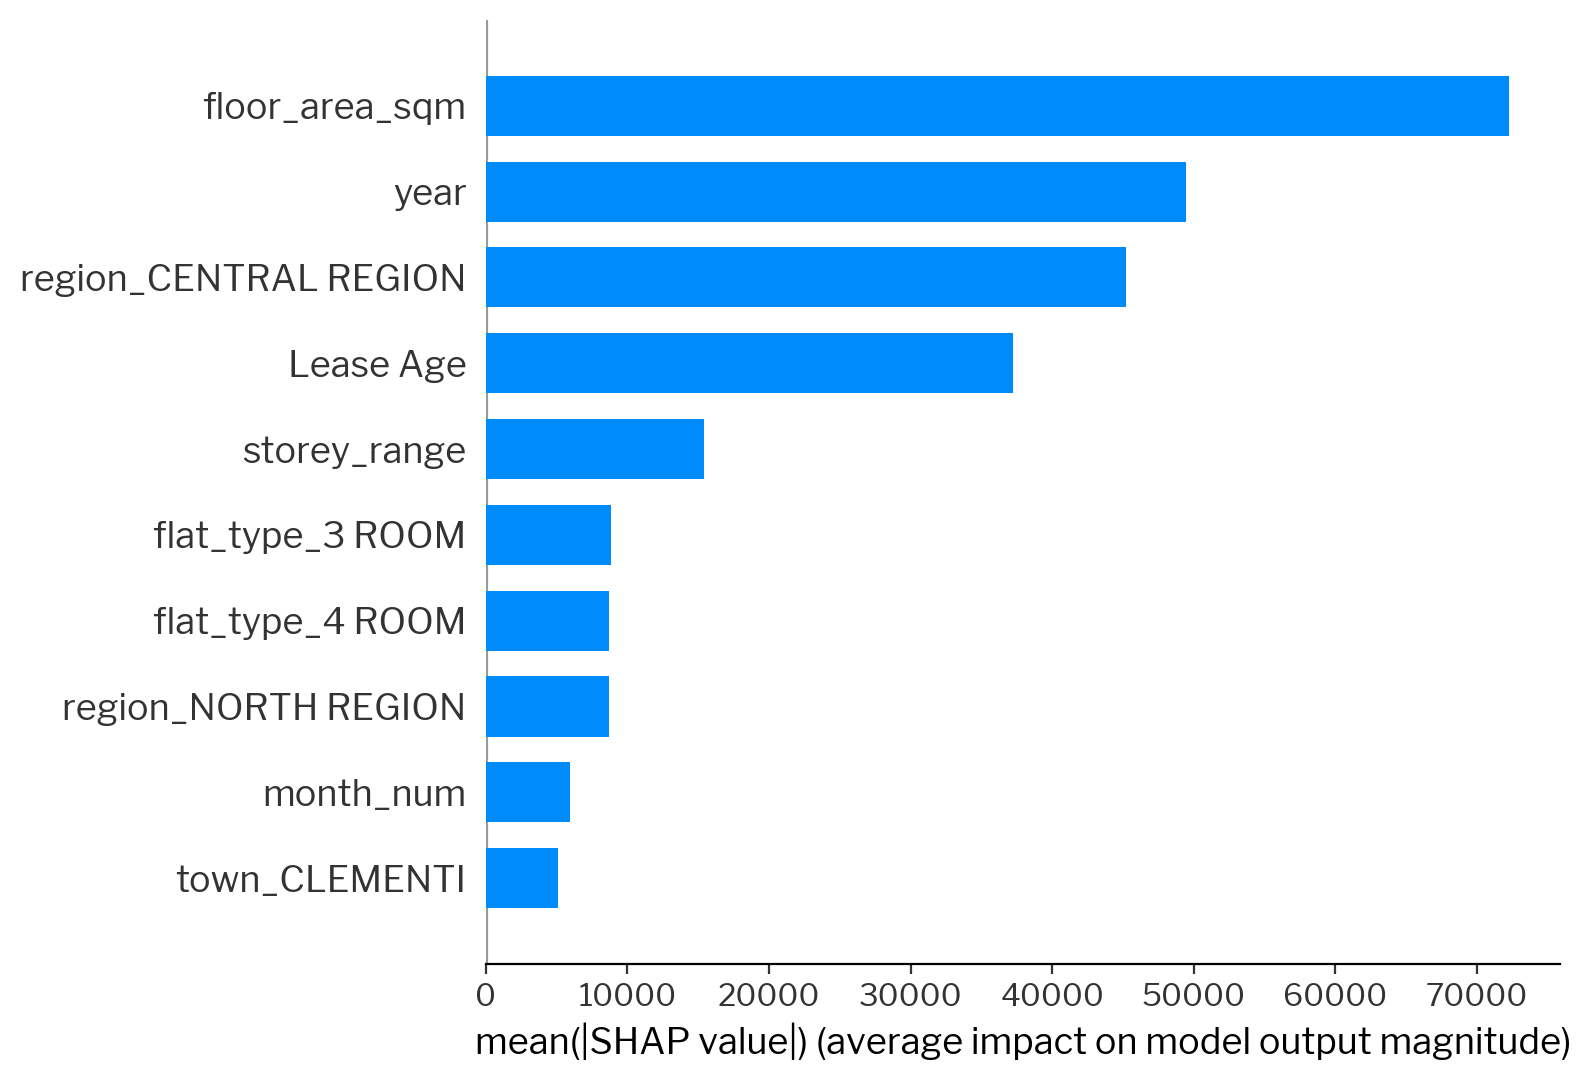

In [37]:
shap.summary_plot(shap_values, X_sample_proctest, plot_type="bar", max_display=10)

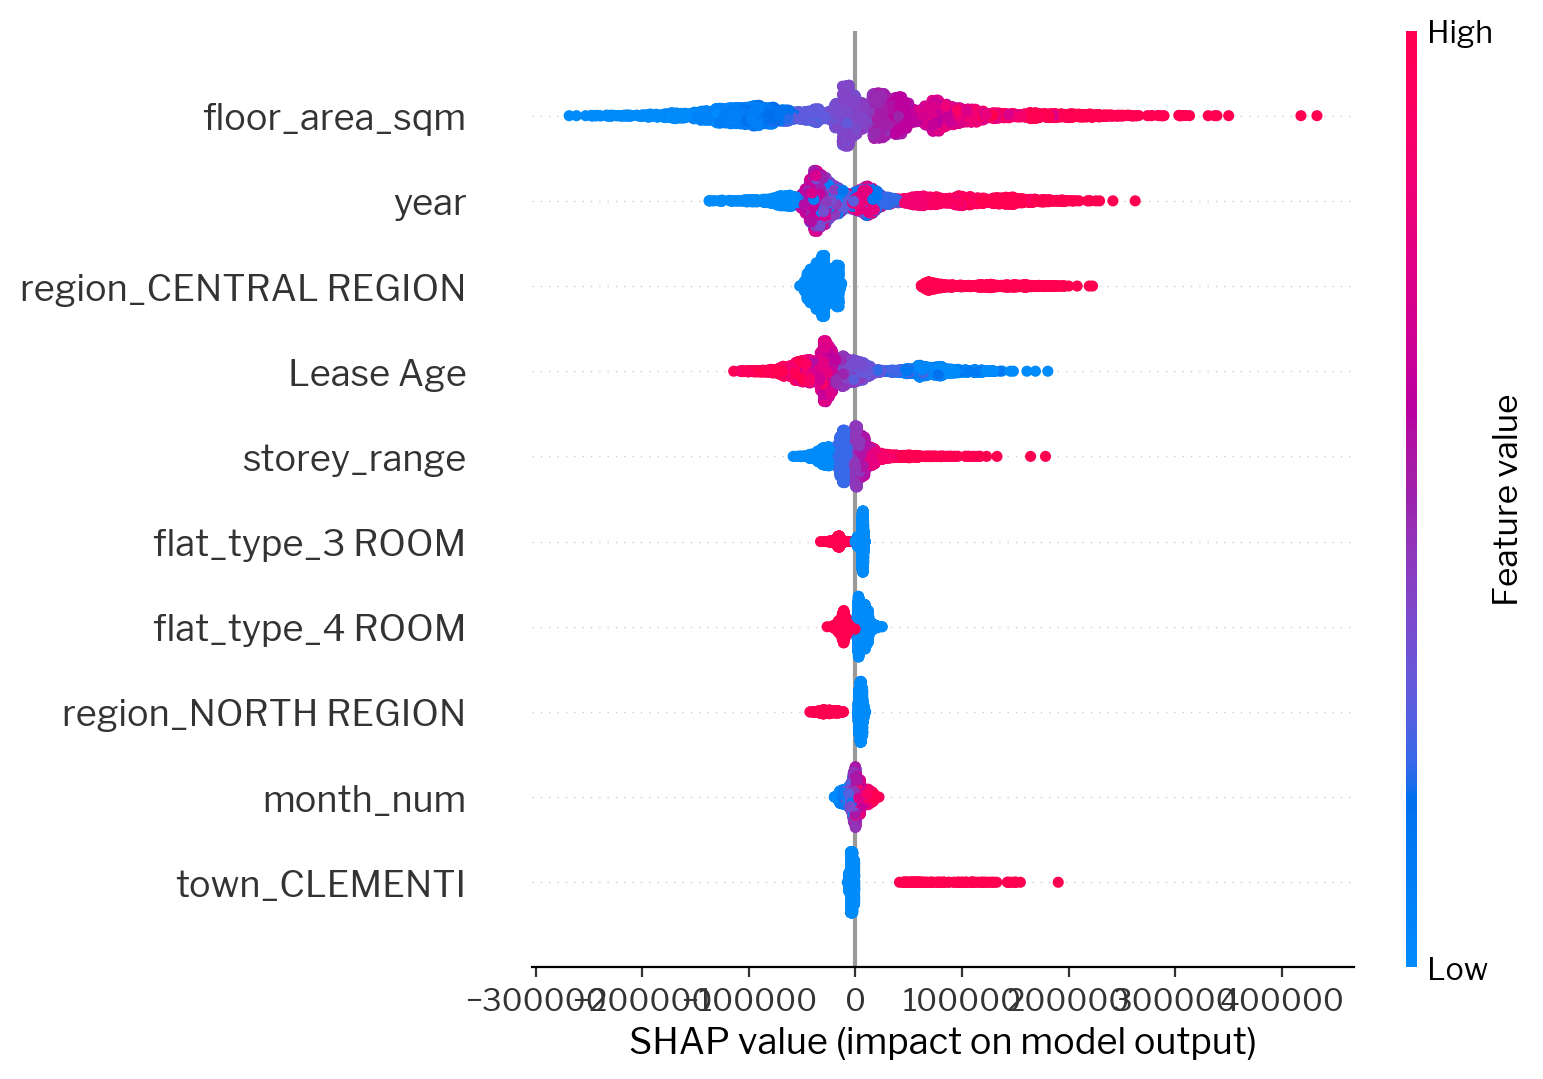

In [38]:
shap.summary_plot(shap_values, X_sample_proctest, plot_type="dot", max_display=10)

In [39]:
import numpy as np

# Compute mean absolute SHAP value per feature
shap_df = pd.DataFrame({
    'feature': X_sample_proctest.columns,
    'mean_abs_shap': np.abs(shap_values.values).mean(axis=0)
})

# Sort by importance
shap_df = shap_df.sort_values(by='mean_abs_shap', ascending=False).reset_index(drop=True)

# Show top 10
print(shap_df.head(10))

                 feature  mean_abs_shap
0         floor_area_sqm   72270.950182
1                   year   49425.280079
2  region_CENTRAL REGION   45241.421996
3              Lease Age   37213.042324
4           storey_range   15440.698705
5       flat_type_3 ROOM    8838.380271
6       flat_type_4 ROOM    8717.686056
7    region_NORTH REGION    8680.079612
8              month_num    5956.335244
9          town_CLEMENTI    5082.216889


In [40]:
# Dependence plot for specific features
# floor area, lease age, storey range, and month number

In [41]:
# 1. Get base SHAP value matrix
shap_vals = shap_values.values  # shape: (n_samples, n_features)

# 2. Combine into DataFrame
shap_df_long = pd.DataFrame(shap_vals, columns=X_sample_proctest.columns)
feature_df_long = X_sample_proctest.reset_index(drop=True)  # Align index

# 3. Melt both to long format
shap_melted = shap_df_long.melt(var_name='feature', value_name='shap_value')
value_melted = feature_df_long.melt(var_name='feature', value_name='feature_value')

# 4. Combine
summary_df = shap_melted.copy()
summary_df['feature_value'] = value_melted['feature_value']

# 5. Optionally: compute summary stats
feature_summary = (
    summary_df
    .groupby('feature')['shap_value']
    .agg(mean_abs_shap=lambda x: np.mean(np.abs(x)))
    .reset_index()
    .sort_values(by='mean_abs_shap', ascending=False)
)

# Display top 10 features
top_10_features = feature_summary.head(10)['feature']
top_10_summary_df = summary_df[summary_df['feature'].isin(top_10_features)]


In [42]:
top_10_summary_df

feature    shap_value  feature_value
0              floor_area_sqm -15310.667396       0.160858
1              floor_area_sqm  43643.630440       0.235329
2              floor_area_sqm  83998.157077       0.271075
3              floor_area_sqm  79560.055169       0.268097
4              floor_area_sqm -82739.813371       0.107239
...                       ...           ...            ...
16914995  region_NORTH REGION   3336.746861       0.000000
16914996  region_NORTH REGION   6645.575137       0.000000
16914997  region_NORTH REGION -21473.807504       1.000000
16914998  region_NORTH REGION   4631.420937       0.000000
16914999  region_NORTH REGION   4742.271027       0.000000

[50000 rows x 3 columns]

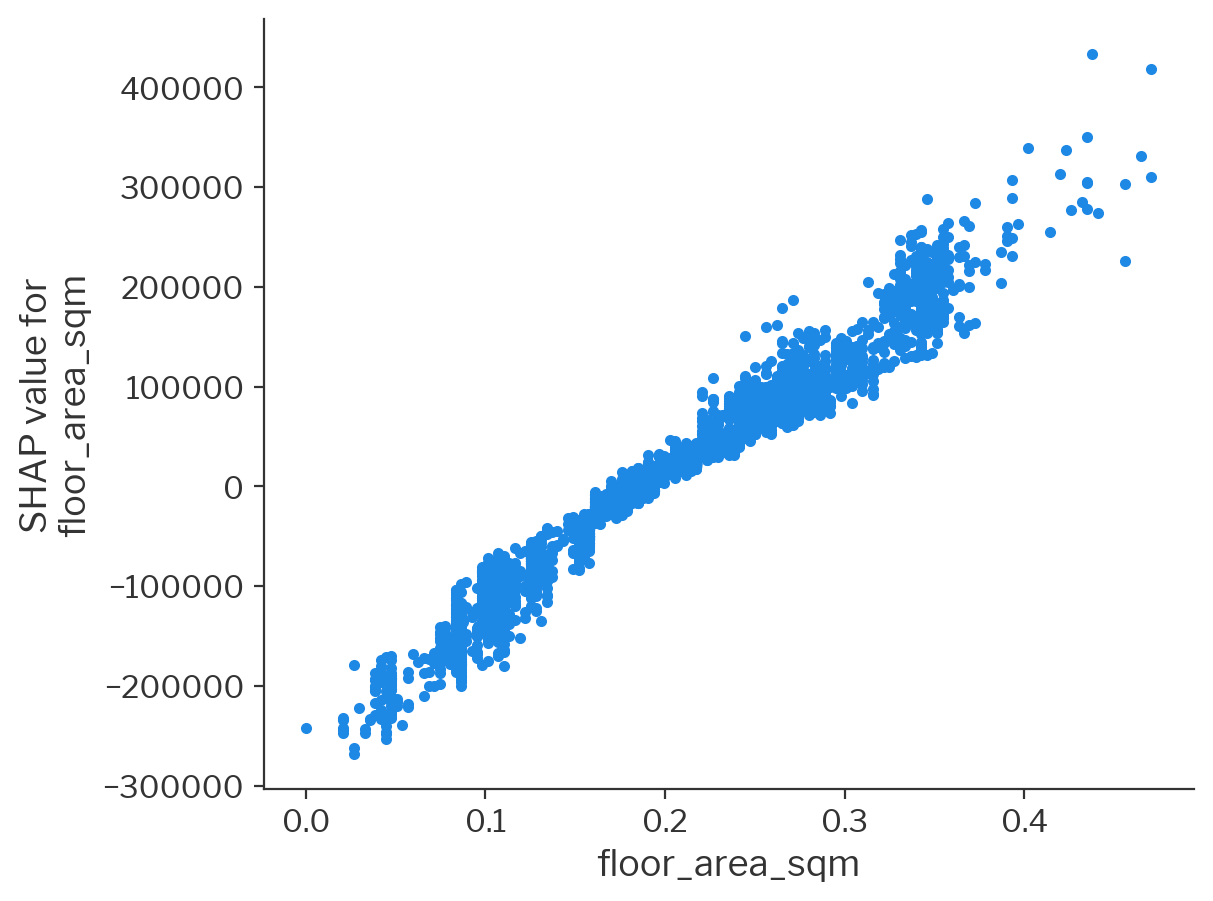

In [43]:
shap.dependence_plot("floor_area_sqm", shap_values.values, X_sample_proctest, interaction_index=None)

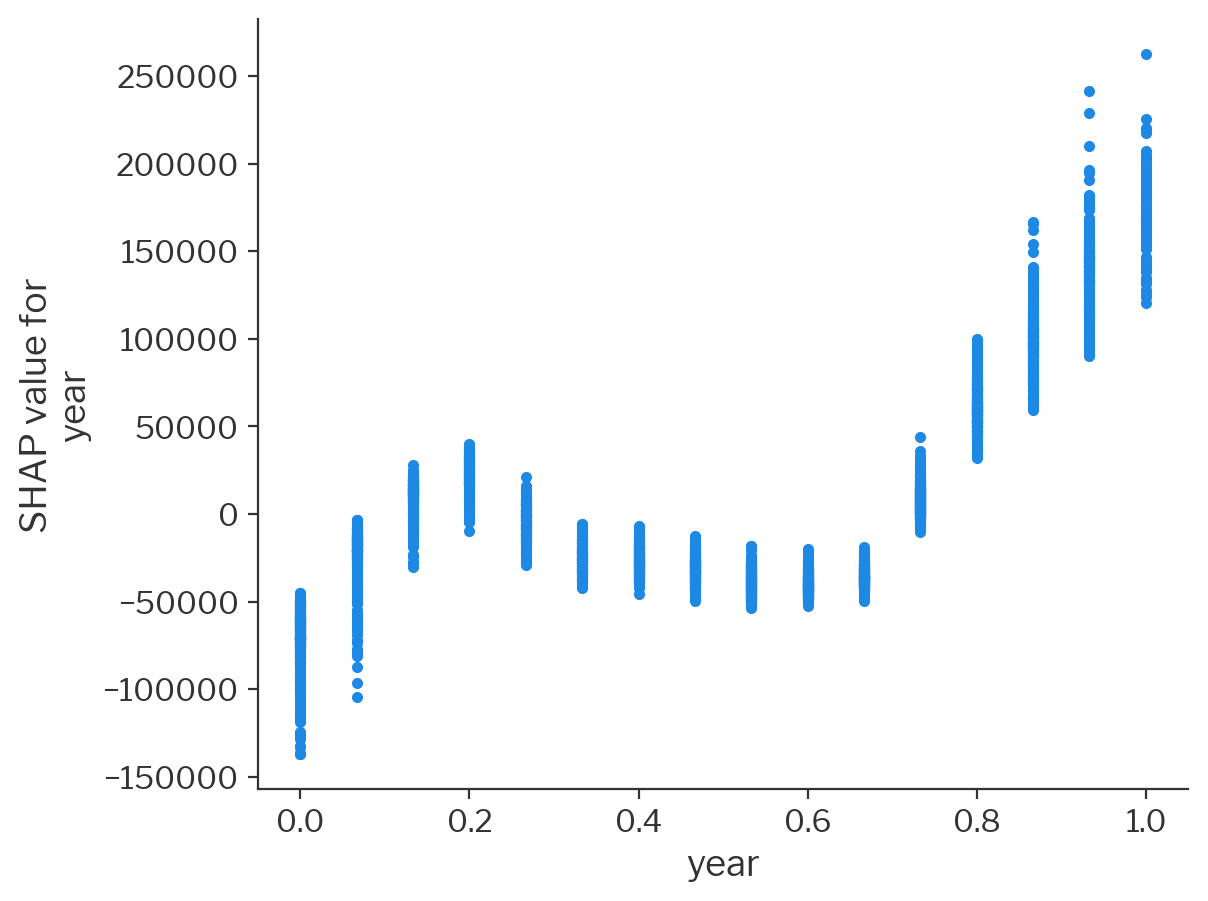

In [44]:
shap.dependence_plot("year", shap_values.values, X_sample_proctest, interaction_index=None)

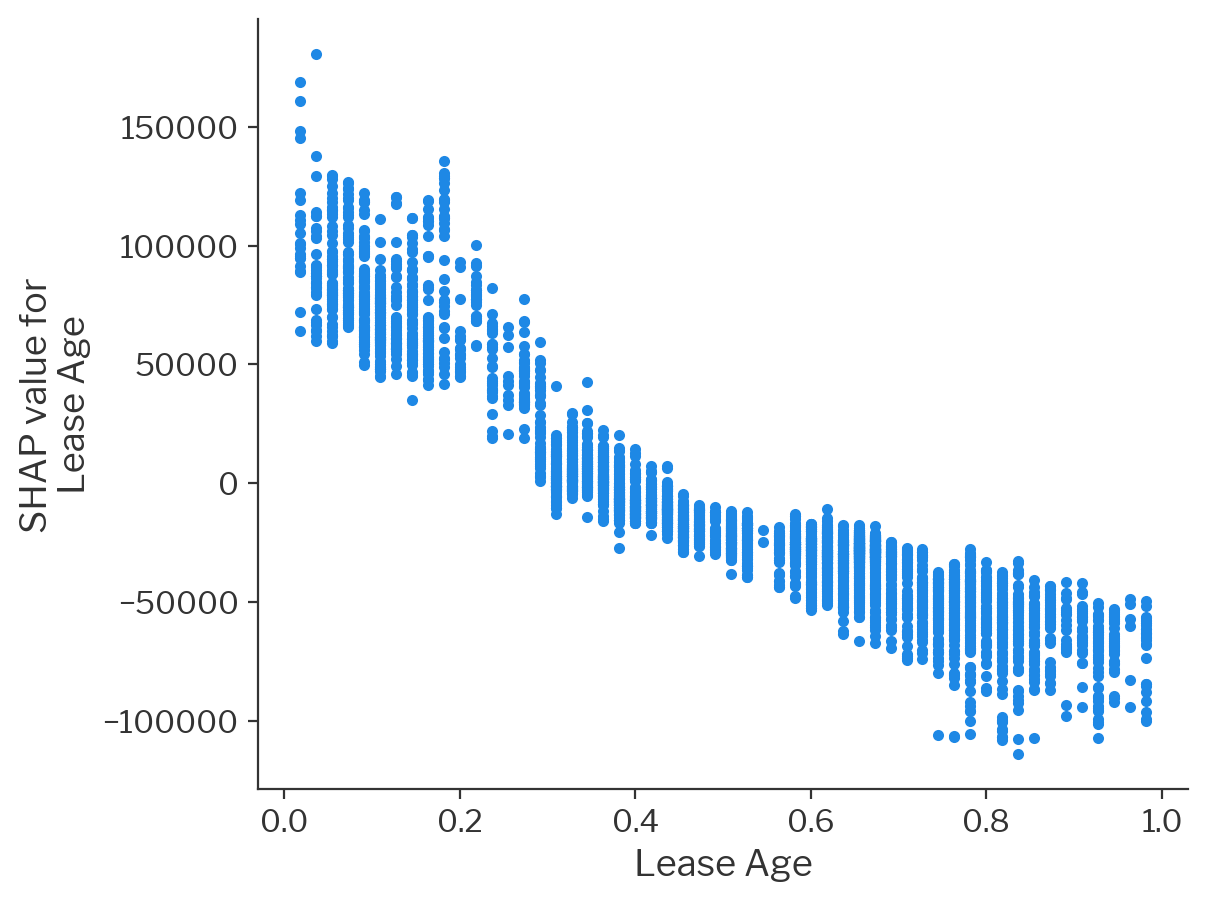

In [45]:
shap.dependence_plot("Lease Age", shap_values.values, X_sample_proctest, interaction_index=None)

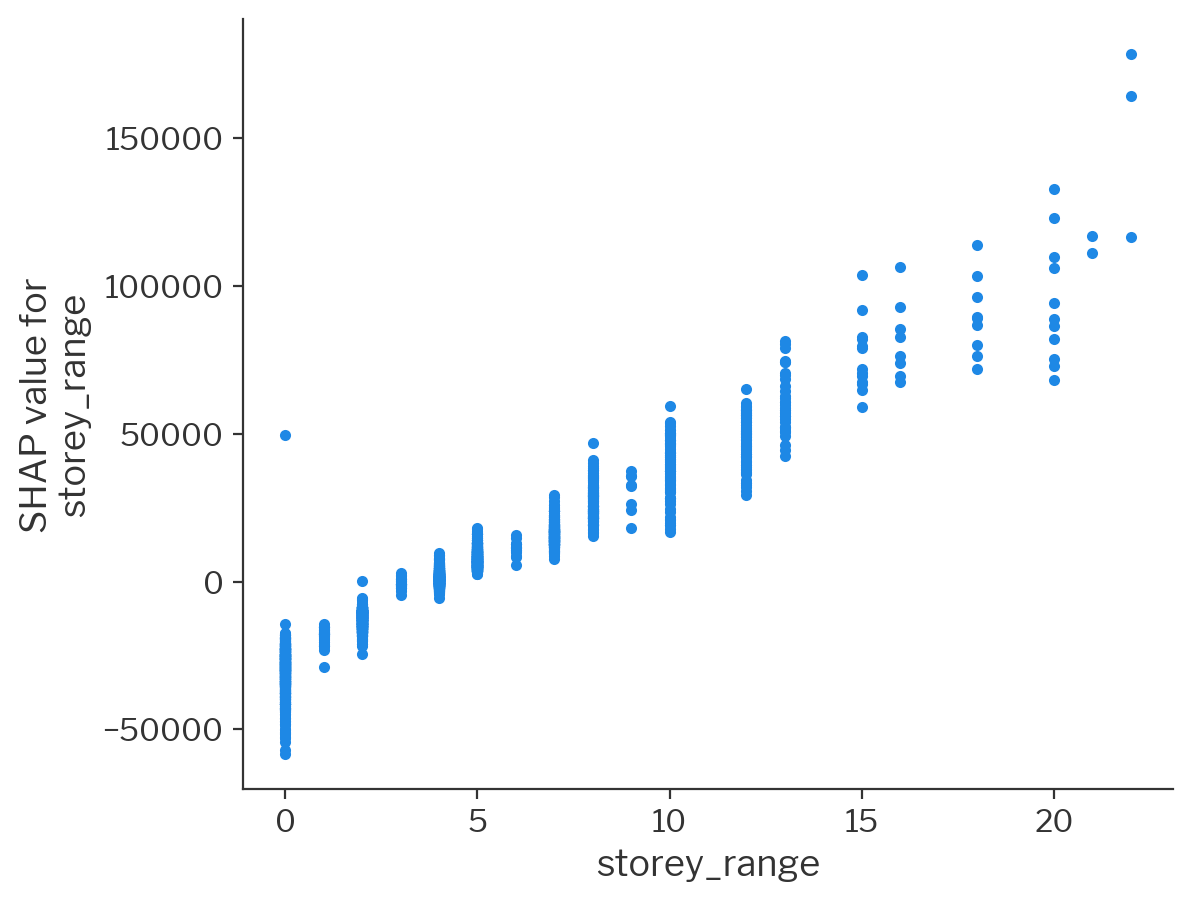

In [46]:
shap.dependence_plot("storey_range", shap_values.values, X_sample_proctest, interaction_index=None)

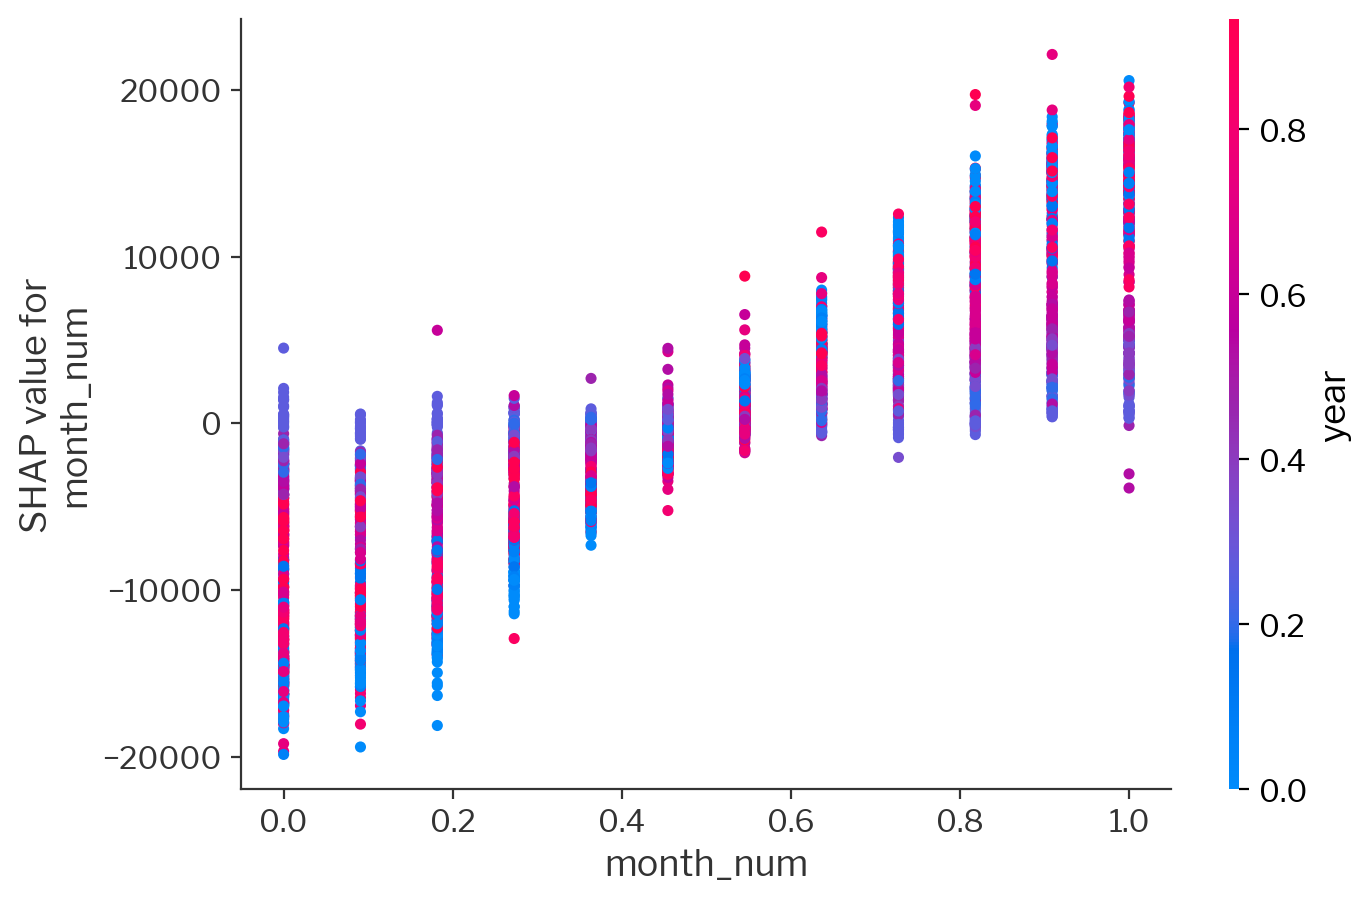

In [57]:
shap.dependence_plot("month_num", shap_values.values, X_sample_proctest, interaction_index='year')

In [49]:
import pandas as pd

# 1. Target feature
feature = "month_num"

# 2. Extract SHAP values for that feature (1D array)
shap_column = shap_values[:, X_sample_proctest.columns.get_loc(feature)].values

# 3. Extract original feature values
feature_column = X_sample_proctest[feature].values

# 4. Combine into a DataFrame
dependence_df = pd.DataFrame({
    'feature': feature_column,
    'shap_value': shap_column
})

# Optional: sort or visualize
print(dependence_df.head())

    feature    shap_value
0  0.545455    102.432576
1  0.090909 -14077.561415
2  0.454545    237.136916
3  0.636364   5937.998219
4  0.181818  -7061.305869


In [54]:
sorted(dependence_df['feature'].unique())

# Replace the sorted values with their corresponding month names

month_mapping = {
    0: 'January',
    0.09090909090909091: 'February',
	0.1818181818181818: 'March',
	0.2727272727272727: 'April',
	0.36363636363636365: 'May',
	0.4545454545454545: 'June',
	0.5454545454545454: 'July',
	0.6363636363636364: 'August',
	0.7272727272727273: 'September',
	0.8181818181818182: 'October',
	0.9090909090909091: 'November',
	0.9999999999999999: 'December'
}

dependence_df['feature'] = dependence_df['feature'].map(month_mapping)

In [55]:
dependence_df

feature    shap_value
0          July    102.432576
1      February -14077.561415
2          June    237.136916
3        August   5937.998219
4         March  -7061.305869
...         ...           ...
4995    January -11367.457407
4996    January  -3795.897672
4997      March -10120.520876
4998  September   4257.700096
4999   December  16269.892053

[5000 rows x 2 columns]